# Google Travel Reveiw User Segmentation
By Chiwei Peng, Weifeng Guo, Shiyun Zhao

## Problem Statement
The goal is to provide tailored recommendations to individuals based on their preferences and patterns observed in their respective user groups

## Background
In the digital age, online ratings play a crucial role in shaping potential consumers’ decisions in both products and services. Online ratings crucial in the travel industry, where customers heavily rely on these ratings to evaluate the quality and reputation of the attractions, and subsequently visit attractions with higher ratings. By observing how different groups of users rate, we can discover their preferences on the attractions. With this information at hand, we can recommend tourist attractions to customers based on their ratings through methods such as internet advertisements or flyers distributed in certain locations that target specific visitors. 

## Dataset Overview
This dataset is a cross-sectional data created in 2018-12-19 and collected from locations across the entire Europe. The dataset contains 5456 rows and 25 columns. Each feature is a rating of an attraction that ranges from 0 to 5, with 0 being the lowest rated and 5 being highest rated.

## Sources
Dataset used is "Tarvel Review Ratings Data Set" from https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings. We do not own the data set. 

## Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

import numpy as np
import pandas as pd
import mglearn


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker
import seaborn as sns


import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import silhouette_score


from ds_utils.unsupervised import plot_cluster_cardinality
from ds_utils.unsupervised import plot_cluster_magnitude
from scipy.spatial.distance import euclidean
from ds_utils.unsupervised import plot_magnitude_vs_cardinality

## Preprocessing

In [2]:
df = pd.read_csv("google_review_ratings.csv")
df

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,...,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN


- The feature Category 1 can be dropped as the indeces serve its purpose.
- The feature Category 25 can be dropped as it only consists of null values
- Column header should be renamed for easier interpretation

In [3]:
#Remove unnecessary columns
df.drop(columns=['User','Unnamed: 25'], inplace= True)
df

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,...,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


In [4]:
#Add column header
features = ['churches', 'resorts', 'beaches', 'parks', 'theatres', 
            'museums', 'malls', 'zoo', 'restaurants', 'bars', 'local_service',
            'burger', 'lodgings', 'juice_bars', "art_galleries", 'dance_clubs',
            'swimming_pool', 'gym', 'bakeries', 'spas', 'cafes', 'viewpoints', 'monuments', 'gardens']

In [5]:
index = 0
for i in features:
    df.rename(columns={df.columns[index]:i}, inplace=True)
    index+=1

In [6]:
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,bars,...,art_galleries,dance_clubs,swimming_pool,gym,bakeries,spas,cafes,viewpoints,monuments,gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [7]:
#Check if datatypes are correct
df.dtypes

churches         float64
resorts          float64
beaches          float64
parks            float64
theatres         float64
museums          float64
malls            float64
zoo              float64
restaurants      float64
bars             float64
local_service     object
burger           float64
lodgings         float64
juice_bars       float64
art_galleries    float64
dance_clubs      float64
swimming_pool    float64
gym              float64
bakeries         float64
spas             float64
cafes            float64
viewpoints       float64
monuments        float64
gardens          float64
dtype: object

In [8]:
print(df[["local_service"]])

     local_service
0              1.7
1              1.7
2              1.7
3             1.73
4              1.7
...            ...
5451          1.02
5452          1.01
5453          0.99
5454          0.97
5455          0.95

[5456 rows x 1 columns]


Despite the column "local_service" is in the wrong datatype, the values are correct so it can be converted directly to float

In [9]:
df['local_service'] = pd.to_numeric(df['local_service'], errors='coerce').astype(float)
df.dtypes

churches         float64
resorts          float64
beaches          float64
parks            float64
theatres         float64
museums          float64
malls            float64
zoo              float64
restaurants      float64
bars             float64
local_service    float64
burger           float64
lodgings         float64
juice_bars       float64
art_galleries    float64
dance_clubs      float64
swimming_pool    float64
gym              float64
bakeries         float64
spas             float64
cafes            float64
viewpoints       float64
monuments        float64
gardens          float64
dtype: object

In [10]:
#Check for missing values
df.isnull().sum()

churches         0
resorts          0
beaches          0
parks            0
theatres         0
museums          0
malls            0
zoo              0
restaurants      0
bars             0
local_service    1
burger           1
lodgings         0
juice_bars       0
art_galleries    0
dance_clubs      0
swimming_pool    0
gym              0
bakeries         0
spas             0
cafes            0
viewpoints       0
monuments        0
gardens          1
dtype: int64

There are 3 columns that each have 1 null value. Because the average rating that will be used is derived from the mean value, we can impute the null values with the mean value of the feature

In [11]:
#Impute by replacing null values with mean values of column
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

churches         0
resorts          0
beaches          0
parks            0
theatres         0
museums          0
malls            0
zoo              0
restaurants      0
bars             0
local_service    0
burger           0
lodgings         0
juice_bars       0
art_galleries    0
dance_clubs      0
swimming_pool    0
gym              0
bakeries         0
spas             0
cafes            0
viewpoints       0
monuments        0
gardens          0
dtype: int64

## Exploratory Data Analysis

In [12]:
df.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,bars,...,art_galleries,dance_clubs,swimming_pool,gym,bakeries,spas,cafes,viewpoints,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171649
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


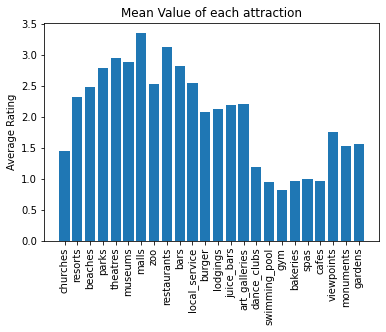

In [13]:
mean_values = df.mean()

plt.bar(mean_values.index, mean_values.values)
plt.ylabel('Average Rating')
plt.title('Mean Value of each attraction')
plt.xticks(rotation=90)
plt.show();

In [14]:
#Find 5 columns with highest mean
sorted_mean_values = mean_values.sort_values(ascending=False)
top_5_columns = sorted_mean_values[:5]
print(top_5_columns)

malls          3.351395
restaurants    3.126019
theatres       2.958941
museums        2.893490
bars           2.832729
dtype: float64


In [15]:
#Find 5 columns with lowest mean
sorted_mean_values = mean_values.sort_values(ascending=True)
lowest_5_columns = sorted_mean_values[:5]
print(lowest_5_columns)

gym              0.822414
swimming_pool    0.949203
cafes            0.965838
bakeries         0.969811
spas             1.000071
dtype: float64


In [16]:
#Find 5 columns with highest standard deviation
std_values = df.std()
sorted_std_values = std_values.sort_values(ascending=False)
top_5_columns = sorted_std_values[:5]
print(top_5_columns)

art_galleries    1.715961
viewpoints       1.598734
juice_bars       1.576686
resorts          1.421438
malls            1.413492
dtype: float64


In [17]:
#Find 5 columns with lowest standard deviation
sorted_std_values = std_values.sort_values(ascending=True)
lowest_5_columns = sorted_std_values[:5]
print(lowest_5_columns)

churches         0.827604
cafes            0.929853
gym              0.947911
swimming_pool    0.973536
dance_clubs      1.107005
dtype: float64


#### Correlation Heat Map

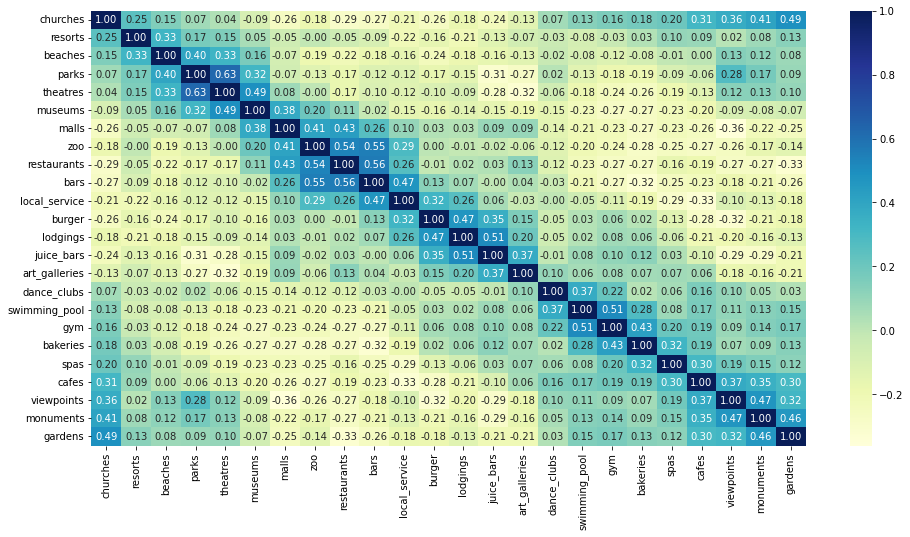

In [18]:
plt.figure(figsize= (16, 8))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f');

- The features with the highest correlation in magnitude are parks and theatres, having a correlation of 0.63
- The features with the lowest correlation in magnitude are burger and zoo, having a correlation of 0.00
- There are no features that have abnormally high correlations. No features are dropped

####  Principal Componenet Analysis for Visualization
Select 2 or 3 principal components to plot the data in either 2D or 3D accordingly. In this model, 3 principal components are used

In [19]:
#Scale the data 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [20]:
#Fit PCA
pca_2 = PCA(n_components=3)
principal_components = pca_2.fit_transform(scaled_data)

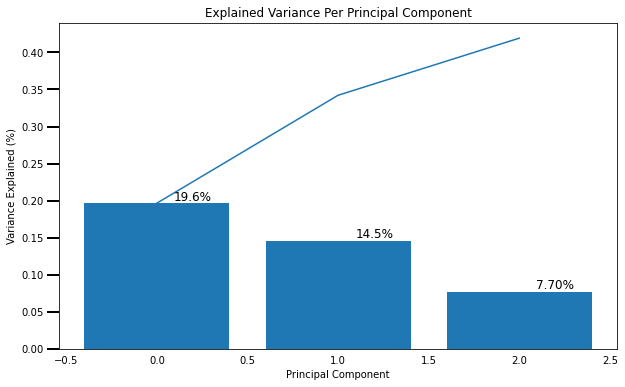

In [21]:
#Scree plot
ind = np.arange(3)
vals = pca_2.explained_variance_ratio_
 
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)
ax.bar(ind, vals)
ax.plot(ind, np.cumsum(vals))

for i in range(3):
    ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=2, length=12)
 
ax.set_xlabel("Principal Component")
ax.set_ylabel("Variance Explained (%)")
plt.title('Explained Variance Per Principal Component');

In [22]:
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance explained by 3 principal components: 41.92%


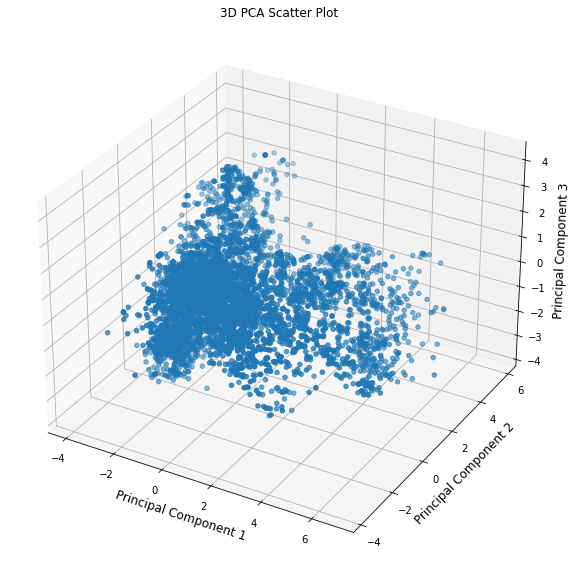

In [23]:
#Scatter plot with 3 principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2])

ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.set_title('3D PCA Scatter Plot')
fig.set_size_inches(10, 10, 10);

## Find optimal value of K

#### Elbow Method

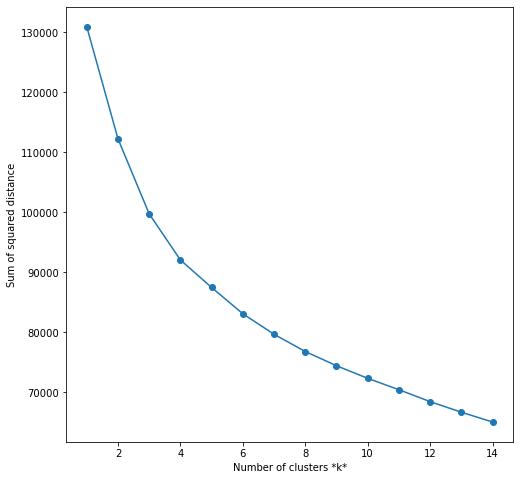

In [24]:
sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_data)
    sse.append(km.inertia_)
    
# Plot sse against k
plt.figure(figsize=(8, 8))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.show();

There is no clear elbow, so use Silhouette Index to find k

#### Silhouette Index

In [25]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score);

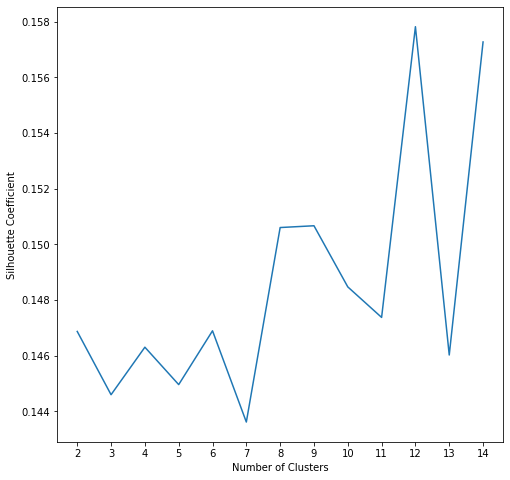

In [26]:
plt.figure(figsize=(8, 8));
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show();

To not make the analysis overcomplicated, the maximum is at most 5 clusters. The optimal number of clusters according to the silhouette coefficient is 2 as it has the highest silhoutte coefficient in the range. However, thinking that 2 may be too small of a number and 4 may be more suitable, Kneelocator is used to reconfirm the cluster number to use.

In [27]:
# give context e.g: if you use sse to determine, then k should be 4.
#if you use silhoute coefficient and upper bound is 7, then k should be 5
from kneed import KneeLocator

kl = KneeLocator(range(1, 15), sse, curve="convex", direction="decreasing")
print("The kvalue of the elbow point is: ", kl.elbow)

The kvalue of the elbow point is:  4


#### Visualising Clusters with PCA

In [28]:
# create kmeans object; set the number of clusters as 4
kmeans_PCA = KMeans(init='random',
                n_clusters=4,
                n_init=1,
                max_iter=300)

kmeans_PCA.fit(principal_components)
labels_PCA = kmeans_PCA.fit_predict(principal_components);

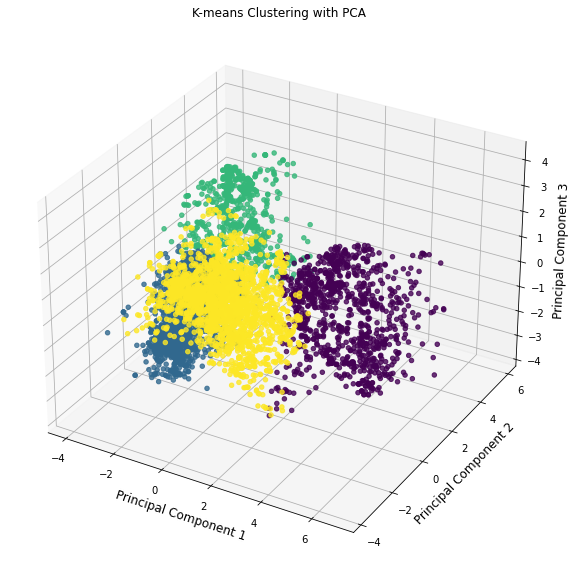

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2],\
           c=labels_PCA, cmap='viridis', alpha=0.8)
ax.set_xlabel('Principal Component 1',fontsize=12)
ax.set_ylabel('Principal Component 2',fontsize=12)
ax.set_zlabel('Principal Component 3',fontsize=12)
ax.set_title('K-means Clustering with PCA')
fig.set_size_inches(10, 10, 10);

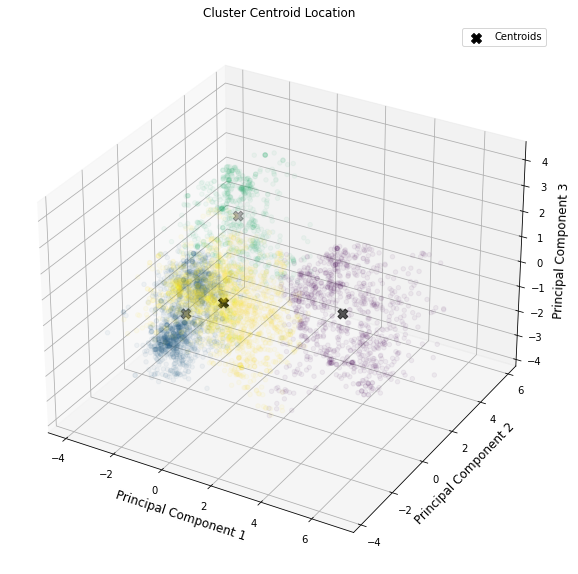

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2],\
           c=labels_PCA, cmap='viridis', alpha=0.05)
ax.scatter(kmeans_PCA.cluster_centers_[:,0], kmeans_PCA.cluster_centers_[:, 1], kmeans_PCA.cluster_centers_[:, 2],\
           marker='X', c='black', s=100, label='Centroids')
ax.set_xlabel('Principal Component 1',fontsize=12)
ax.set_ylabel('Principal Component 2',fontsize=12)
ax.set_zlabel('Principal Component 3',fontsize=12)
ax.set_title('Cluster Centroid Location')
fig.set_size_inches(10, 10,10)
plt.legend()
plt.show();

After the cluster converges, the 4 clusters are well defined

## Modeling
By default, the distance metric is Euclidean distance

In [31]:
kmeans = KMeans(init='random',
                n_clusters=4,
                n_init=1,
                max_iter=300)

kmeans.fit(scaled_data)

labels = kmeans.fit_predict(scaled_data)

# print the model parameters (number of iterations and SSE)
print('The number of iterations used for the solution is:', kmeans.n_iter_)
print('The SSE for the solution is:', kmeans.inertia_);

The number of iterations used for the solution is: 22
The SSE for the solution is: 92077.17464018363


## Analyzing Cluster Characteristics

#### Cluster magnitude and cardinality

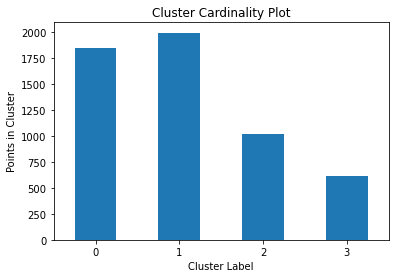

In [32]:
#Cluster Cardinality Plot
plot_cluster_cardinality(labels);
plt.title('Cluster Cardinality Plot')
plt.show();

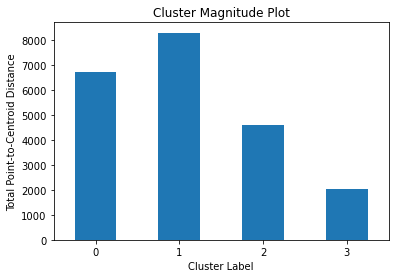

In [33]:
#Cluster Magnitude plot
plot_cluster_magnitude(scaled_data, labels, kmeans.cluster_centers_, euclidean)
plt.title('Cluster Magnitude Plot')
plt.show();

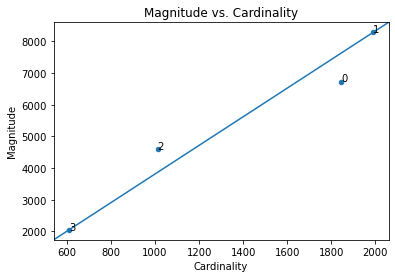

In [34]:
# Magnitude vs Cardinality plot
plot_magnitude_vs_cardinality(scaled_data, labels, kmeans.cluster_centers_, euclidean)
plt.title('Magnitude vs. Cardinality')
plt.show();

All clusters are close to the 45 degree line, no severe anomalies present in the graph

#### Visualize average ratings for each group

In [35]:
group1 = np.where(labels==0)
group2 = np.where(labels==1)
group3 = np.where(labels==2)
group4 = np.where(labels==3)

Continue using means of each column as average rating

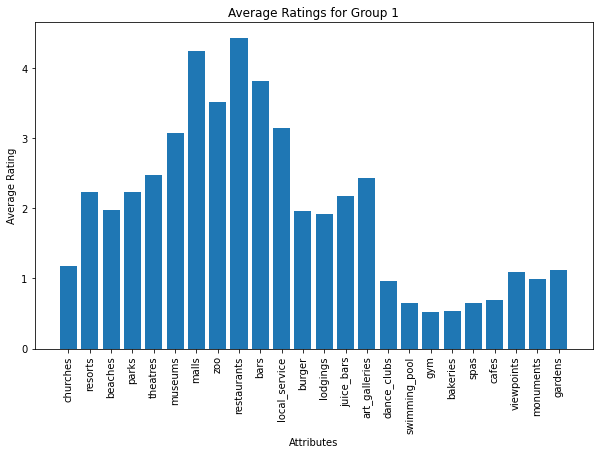

In [36]:
selected_rows = df.loc[group1]
plt.figure(figsize=(10, 6))
plt.bar(selected_rows.columns, selected_rows.mean())
plt.xlabel('Attributes')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Group 1')
plt.xticks(rotation=90)
plt.show();

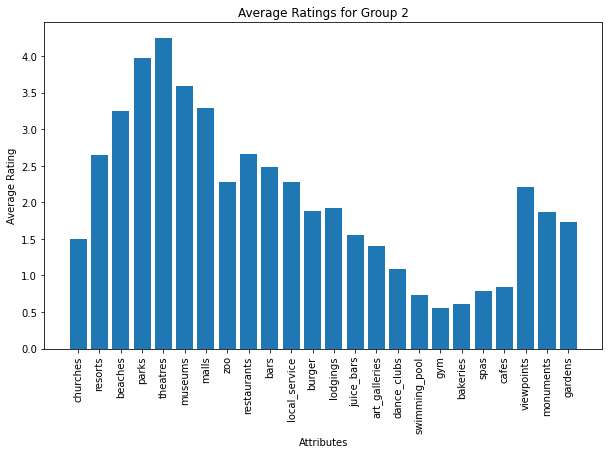

In [37]:
selected_rows = df.loc[group2]
plt.figure(figsize=(10, 6))
plt.bar(selected_rows.columns, selected_rows.mean())
plt.xlabel('Attributes')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Group 2')
plt.xticks(rotation=90)
plt.show();

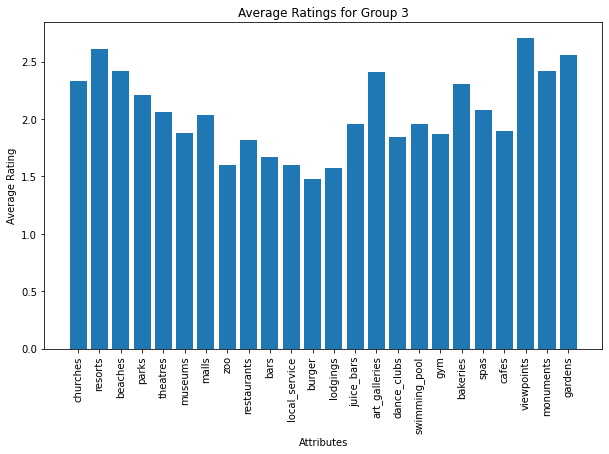

In [38]:
selected_rows = df.loc[group3]
plt.figure(figsize=(10, 6))
plt.bar(selected_rows.columns, selected_rows.mean())
plt.xlabel('Attributes')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Group 3')
plt.xticks(rotation=90)
plt.show();

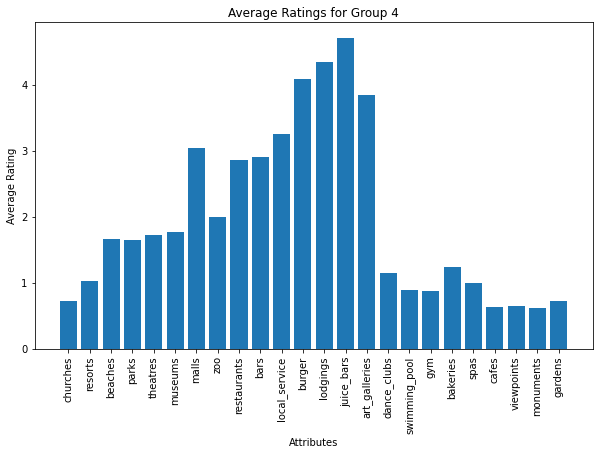

In [39]:
selected_rows = df.loc[group4]
plt.figure(figsize=(10, 6))
plt.bar(selected_rows.columns, selected_rows.mean())
plt.xlabel('Attributes')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Group 4')
plt.xticks(rotation=90)
plt.show();